In [4]:
### header ###
__author__ = "Jenhan Tao"
__license__ = "BSD"
__email__ = "jenhantao@gmail.com"
%load_ext autoreload
%autoreload 2
### imports ###
import sys
%matplotlib inline
sys.path.append("/home/jenhan/code/seq_merge_pipe/")
import os
import pandas as pd
import numpy as np
import argparse
import matplotlib
import itertools
import scipy
import matplotlib.pyplot as plt 
import seaborn as sns
sys.setrecursionlimit(3000)
os.chdir('/home/jenhan/analysis/go_analysis/')
import pickle
sns.set_context('talk')

/bioinformatics/software/anaconda3/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Build Association File for Mouse

In [29]:
### download the file ###
! rm gene_association.mgi
! rm gene_association.mgi*gz*

! wget http://geneontology.org/gene-associations/gene_association.mgi.gz
! gzip -d gene_association.mgi.gz

--2016-01-06 15:08:20--  http://geneontology.org/gene-associations/gene_association.mgi.gz
Resolving geneontology.org (geneontology.org)... 52.27.86.54
Connecting to geneontology.org (geneontology.org)|52.27.86.54|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5032287 (4.8M) [application/x-gzip]
Saving to: ‘gene_association.mgi.gz.2’

100%[======================================>] 5,032,287   8.82MB/s   in 0.5s   

2016-01-06 15:08:21 (8.82 MB/s) - ‘gene_association.mgi.gz.2’ saved [5032287/5032287]



In [94]:
### read in annoatations ###
numHeaderLines = 0
with open('gene_association.mgi') as f:
    data= f.readlines()
for line in data:
    if line[0] == '!':
        numHeaderLines += 1
    else:
        break
        
mouse_annotation_frame = pd.read_csv('gene_association.mgi', 
                                     sep='\t', 
                                     skiprows=numHeaderLines, 
                                     names=['DB',
                                            'DB_Object_ID',
                                            'DB_Object_Symbol',
                                            'Qualifier',
                                            'GO ID',
                                            'DB_Reference',
                                            'Evidence Code',
                                            'Evidence Code Qualifier',
                                            'Aspect',
                                            'DB_Object_Name',
                                            'DB_Object_Synonym',
                                            'DB_Object_Type',
                                            'taxon_ID',
                                            'Date',
                                            'Assigned_by',
                                            '',
                                            ''
                                        ])
mouse_annotation_frame = mouse_annotation_frame[[
        'DB',
        'DB_Object_ID',
        'DB_Object_Symbol',
        'GO ID',
        'DB_Reference',
        'Evidence Code',
        'Evidence Code Qualifier',
        'Aspect',
        'DB_Object_Name',
        'DB_Object_Synonym',
        'DB_Object_Type',
        'taxon_ID',
        'Date',
        'Assigned_by'
    ]]

### write association file ###
association_file = open('mouse_association', 'w')

gene_names = sorted(list(set(list(mouse_annotation_frame.loc[:,'DB_Object_Symbol'].values))))

mouse_annotation_frame.index = mouse_annotation_frame.loc[:,'DB_Object_Symbol'].values

for g in gene_names:
    current_frame = mouse_annotation_frame.ix[g]
    if len(current_frame.shape) > 1:
        go_ids = current_frame['GO ID']
        association_file.write(g.upper() + '\t' + ';'.join(go_ids) +'\n')
    else:
        go_ids = current_frame['GO ID']
        association_file.write(g.upper() + '\t' + go_ids +'\n')
association_file.close()

In [251]:
### create GO slim associations for mouse ###
!/bioinformatics/software/anaconda2.7/bin/python2 /home/jenhan/code/go_enrichment_scripts/map_to_slim.py --association_file=mouse_association go-basic.obo goslim_generic.obo > mouse_association_slim

load obo file go-basic.obo
45896 nodes imported
load obo file goslim_generic.obo
207 nodes imported


## Build Association File for Human

In [36]:
### download the file ###
! rm gene_association.goa_ref_human
! rm gene_association.goa_ref_human*gz*

! wget http://geneontology.org/gene-associations/gene_association.goa_ref_human.gz
! gzip -d gene_association.goa_ref_human.gz

rm: cannot remove ‘gene_association.goa_ref_human’: No such file or directory
--2016-01-06 15:29:30--  http://geneontology.org/gene-associations/gene_association.goa_ref_human.gz
Resolving geneontology.org (geneontology.org)... 52.27.86.54
Connecting to geneontology.org (geneontology.org)|52.27.86.54|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5060141 (4.8M) [application/x-gzip]
Saving to: ‘gene_association.goa_ref_human.gz’

100%[======================================>] 5,060,141   9.69MB/s   in 0.5s   

2016-01-06 15:29:31 (9.69 MB/s) - ‘gene_association.goa_ref_human.gz’ saved [5060141/5060141]



In [95]:
### read in annoatations ###
numHeaderLines = 0
with open('gene_association.goa_ref_human') as f:
    data= f.readlines()
for line in data:
    if line[0] == '!':
        numHeaderLines += 1
    else:
        break
        
human_annotation_frame = pd.read_csv('gene_association.goa_ref_human', 
                                     sep='\t', 
                                     skiprows=numHeaderLines, 
                                     names=['DB',
                                            'DB_Object_ID',
                                            'DB_Object_Symbol',
                                            'Qualifier',
                                            'GO ID',
                                            'DB_Reference',
                                            'Evidence Code',
                                            'Evidence Code Qualifier',
                                            'Aspect',
                                            'DB_Object_Name',
                                            'DB_Object_Synonym',
                                            'DB_Object_Type',
                                            'taxon_ID',
                                            'Date',
                                            'Assigned_by',
                                            '',
                                            ''
                                        ])
human_annotation_frame = human_annotation_frame[[
        'DB',
        'DB_Object_ID',
        'DB_Object_Symbol',
        'GO ID',
        'DB_Reference',
        'Evidence Code',
        'Evidence Code Qualifier',
        'Aspect',
        'DB_Object_Name',
        'DB_Object_Synonym',
        'DB_Object_Type',
        'taxon_ID',
        'Date',
        'Assigned_by'
    ]]

### write association file ###
association_file = open('human_association', 'w')

gene_names = sorted(list(set(list(human_annotation_frame.loc[:,'DB_Object_Symbol'].values))))

human_annotation_frame.index = human_annotation_frame.loc[:,'DB_Object_Symbol'].values

for g in gene_names:
    current_frame = human_annotation_frame.ix[g]
    if len(current_frame.shape) > 1:
        go_ids = current_frame['GO ID']
        association_file.write(g.upper() + '\t' + ';'.join(go_ids) +'\n')
    else:
        go_ids = current_frame['GO ID']
        association_file.write(g.upper() + '\t' + go_ids +'\n')
association_file.close()

/bioinformatics/software/anaconda3/lib/python3.4/site-packages/pandas/io/parsers.py:1130: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [252]:
!/bioinformatics/software/anaconda2.7/bin/python2 /home/jenhan/code/go_enrichment_scripts/map_to_slim.py --association_file=human_association go-basic.obo goslim_generic.obo > human_association_slim

load obo file go-basic.obo
45896 nodes imported
load obo file goslim_generic.obo
207 nodes imported


## GO Enrichment Test

In [124]:
# read in rpkm file
rpkm_frame = pd.read_csv('rpkm.tsv', sep='\t')
background_genes = [x.split('|')[0] for x in rpkm_frame['Annotation/Divergence'] ]


diff_expressed_frame = pd.read_csv('diffExpression_bmdm.tsv', sep='\t')
target_genes = [x.split('|')[0] for x in diff_expressed_frame[diff_expressed_frame['wt_kla vs. wt_veh FDR'] < 0.05]['Annotation/Divergence'] ]

# read in differentially expressed genes
# target_genes = genes[:100]
target_file =  open('target.tsv', 'w')
for g in target_genes:
     target_file.write(g.upper() + '\n')
target_file.close()

# generate background genes - every expressed gene
# background_genes = target_genes+genes[-1000:]
background_file =  open('background.tsv', 'w')
for g in background_genes:
     background_file.write(g.upper() + '\n')
background_file.close()

In [128]:
!/bioinformatics/software/anaconda2.7/bin/python2 /home/jenhan/code/goatools_scripts/find_enrichment.py target.tsv background.tsv mouse_association --pval=0.5 --fdr > test_results.tsv

Study: 6927 vs. Population 24063
load obo file go-basic.obo
45896 nodes imported
Propagating term counts to parents ..
Generate p-value distribution for FDR based on resampling (this might take a while)
Sample 0 / 500: p-value 0.000409131946995
Sample 10 / 500: p-value 9.38415409036e-05
Sample 20 / 500: p-value 1.66269834459e-05
Sample 30 / 500: p-value 0.000568201735651
Sample 40 / 500: p-value 0.000409131946995
Sample 50 / 500: p-value 0.000827781928068
Sample 60 / 500: p-value 5.87046655721e-05
Sample 70 / 500: p-value 0.000163466941537
Sample 80 / 500: p-value 0.000160085569355
Sample 90 / 500: p-value 4.36817399212e-05
Sample 100 / 500: p-value 0.000247481411716
Sample 110 / 500: p-value 0.000779201910705
Sample 120 / 500: p-value 5.81531236113e-05
Sample 130 / 500: p-value 0.000116007952698
Sample 140 / 500: p-value 0.000711109749394
Sample 150 / 500: p-value 0.000146429472036
Sample 160 / 500: p-value 5.52871383449e-05
Sample 170 / 500: p-value 0.00015179419665
Sample 180 / 500:

In [129]:
results = pd.read_csv('test_results.tsv',sep='\t', skiprows=2)



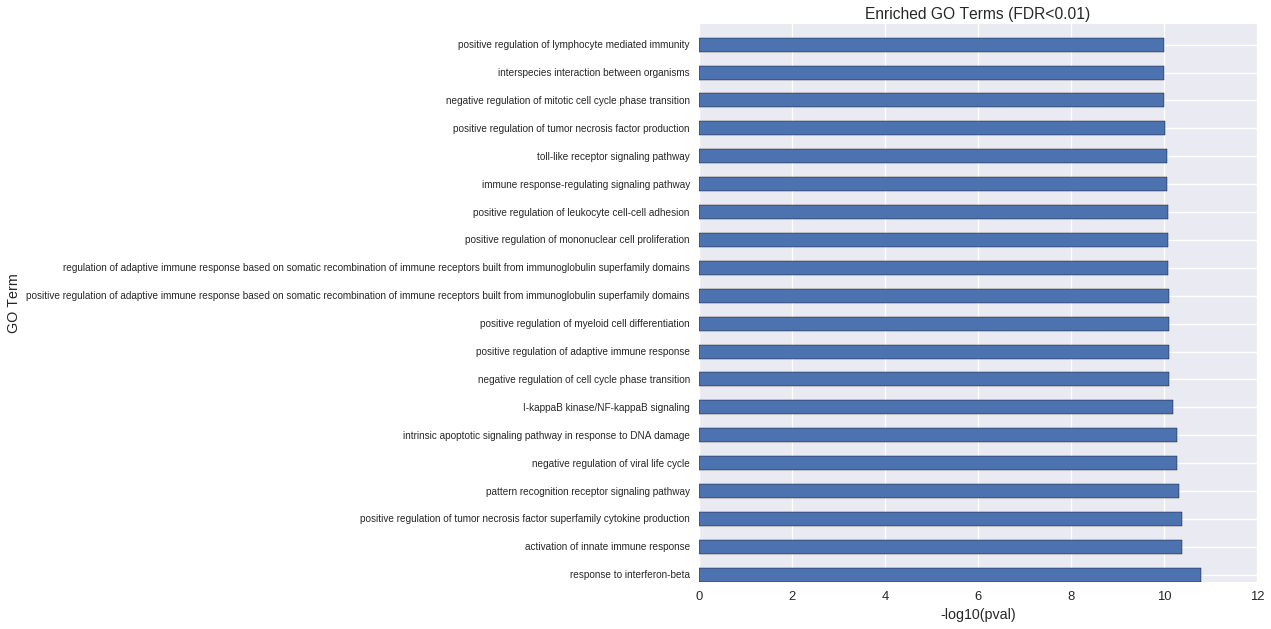

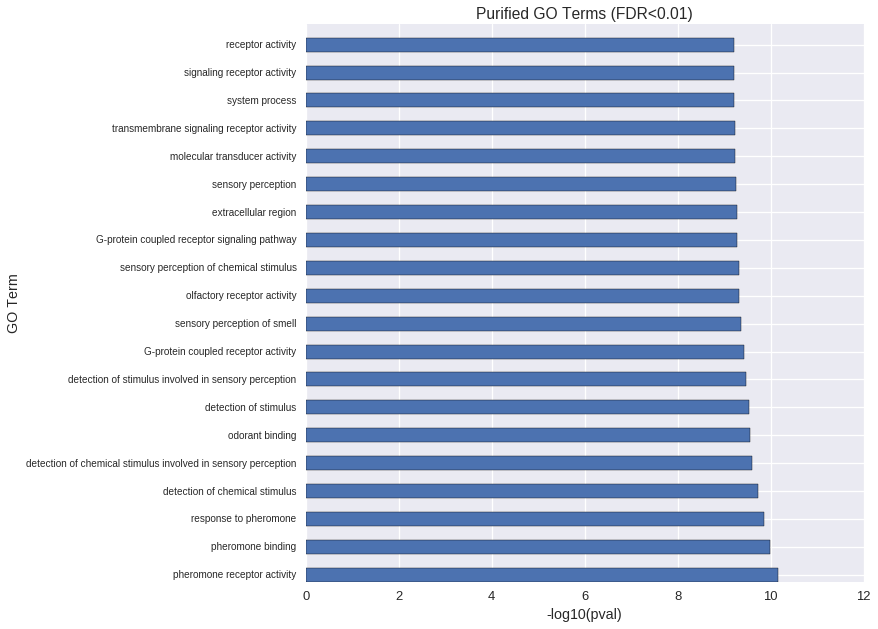

In [249]:
results = pd.read_csv('test_results.tsv',sep='\t', skiprows=2)


maxTerms = 20
fdr_threshold = 0.01
significant_results = results[results['p_fdr'] < fdr_threshold]

# seperate enriched and purified results
enriched_results = significant_results[significant_results['enrichment']=='e']
purified_results= significant_results[significant_results['enrichment']=='p']

# plot enriched results
numTerms = np.min([maxTerms, enriched_results.shape[0]])
plt.figure(figsize = (10,10))
plt.barh(range(numTerms), 
         -1*np.log10(enriched_results.head(numTerms)['p_uncorrected']), 
         height=0.5,
       )
plt.yticks(np.arange(numTerms)+0.25, 
           enriched_results.head(numTerms)['description'], 
           fontsize=10)
plt.ylim([0, numTerms])
plt.ylabel('GO Term')
plt.xlabel('-log10(pval)')
plt.title('Enriched GO Terms (FDR<' + str(fdr_threshold) + ')')
plt.show()

# plot purified results
numTerms = np.min([maxTerms, purified_results.shape[0]])

plt.figure(figsize = (10,10))
plt.barh(range(numTerms), 
         -1*np.log10(purified_results.head(numTerms)['p_uncorrected']), 
         height=0.5,
       )
plt.yticks(np.arange(numTerms)+0.25, 
           purified_results.head(numTerms)['description'], 
           fontsize=10)
plt.ylim([0, numTerms])
plt.ylabel('GO Term')
plt.xlabel('-log10(pval)')
plt.title('Purified GO Terms (FDR<' + str(fdr_threshold) + ')')
plt.show()

In [250]:
results.head()

,id,enrichment,description,ratio_in_study,ratio_in_pop,p_uncorrected,p_bonferroni,p_holm,p_sidak,p_fdr
0,GO:0035456,e,response to interferon-beta,31/6927,36/24063,1.580000e-11,0.000000,0.000000,0.000000,0
1,GO:0002218,e,activation of innate immune response,47/6927,64/24063,4.020000e-11,0.000001,0.000001,0.000001,0
2,GO:1903557,e,positive regulation of tumor necrosis factor s...,45/6927,64/24063,4.020000e-11,0.000001,0.000001,0.000001,0
3,GO:0002221,e,pattern recognition receptor signaling pathway,39/6927,54/24063,4.790000e-11,0.000001,0.000001,0.000001,0
4,GO:1903901,e,negative regulation of viral life cycle,49/6927,72/24063,5.240000e-11,0.000001,0.000001,0.000001,0
